In [1]:
### Image of construction costs

In [85]:
import sys
sys.path.append("..") #import folder which is one level higher

#import csv
#import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
#import os as os
import pandas as pd
from tqdm import tqdm

from utils_functions import load_config
from main_functions import import_flood_curves, import_damage, load_HZ_max_dam

In [31]:
map_dam_curves = load_config()['filenames']['map_dam_curves'] 
interpolators = import_flood_curves(filename = map_dam_curves, sheet_name='All_curves', usecols="B:O")
dict_max_damages = import_damage(map_dam_curves,"Max_damages",usecols="C:E")
max_damages_HZ = load_HZ_max_dam(map_dam_curves,"Huizinga_max_dam","A:G")

In [32]:
interpolators

OrderedDict([('C1', <scipy.interpolate.interpolate.interp1d at 0x2599fe19770>),
             ('C2', <scipy.interpolate.interpolate.interp1d at 0x259a5e96450>),
             ('C3', <scipy.interpolate.interpolate.interp1d at 0x259a5ea8680>),
             ('C4', <scipy.interpolate.interpolate.interp1d at 0x2599fe198b0>),
             ('C5', <scipy.interpolate.interpolate.interp1d at 0x259a5ea85e0>),
             ('C6', <scipy.interpolate.interpolate.interp1d at 0x259a5e92310>),
             ('HZ',
              <scipy.interpolate.interpolate.interp1d at 0x259a5e8d540>)])

In [77]:
interpolators['HZ'](0)

array(0.25)

In [12]:
interpolators['C1'](50)

array(0.01, dtype=object)

In [13]:
dict_max_damages

OrderedDict([('Lower',
              OrderedDict([('motorway', 1750000),
                           ('trunk', 1250000),
                           ('primary', 1000000),
                           ('secondary', 500000),
                           ('tertiary', 200000),
                           ('other', 100000),
                           ('track', 20000),
                           ('none', 0)])),
             ('Upper',
              OrderedDict([('motorway', 17500000),
                           ('trunk', 3750000),
                           ('primary', 3000000),
                           ('secondary', 1500000),
                           ('tertiary', 600000),
                           ('other', 300000),
                           ('track', 50000),
                           ('none', 0)]))])

In [72]:
interpolators["HZ"](depths) #### DIT IS IETS HEEL GEKS

array([0.25, 0.25, 0.42, 0.55, 0.65, 1.  ])

In [73]:
interpolators["C1"](depths) #### DIT IS IETS HEEL GEKS

array([0.0, 0.01, 0.03, 0.075, 0.1, 0.2], dtype=object)

3500000.0 27125000.0 19250000.0
3500000.0 27125000.0 19250000.0
3500000.0 11375000.0 19250000.0
3500000.0 11375000.0 19250000.0


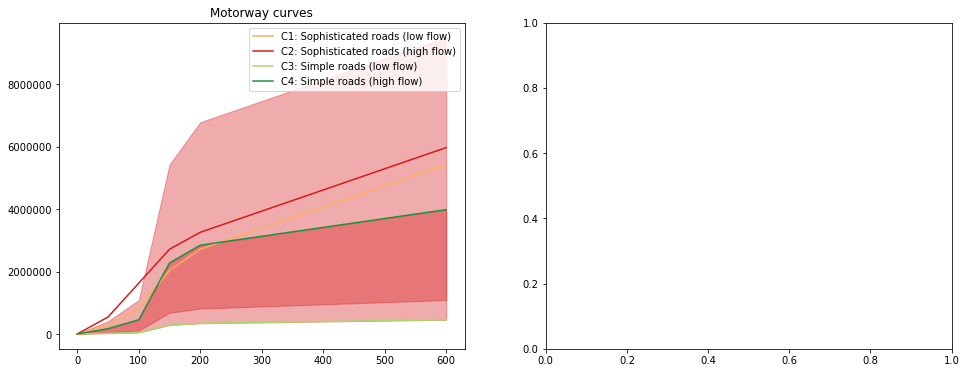

In [141]:
fig,axes = plt.subplots(1,2,figsize=(16,6))

colors = ['#fdae61','#d7191c','#a6d96a','#1a9641']

lower = dict_max_damages['Lower']['motorway']
upper = dict_max_damages['Upper']['motorway']
Range = np.array([lower,0.75*lower+0.25*upper,0.5*lower+0.5*upper,0.25*lower+0.75*upper,upper])

lm = 2 #lane_multiplier, correct so it is a 2*2 road!!!
Range = Range * lm

curvenames = ['C1','C2','C3','C4']
labels = {'C1': 'C1: Sophisticated roads (low flow)',
          'C2': 'C2: Sophisticated roads (high flow)',
          'C3': 'C3: Simple roads (low flow)',
          'C4': 'C4: Simple roads (high flow)'}

for i,curvename in enumerate(curvenames):
    depths = [0,50,100,150,200,600]
    fraction = interpolators[curvename](depths)
    if curvename in ['C1','C2']: #acessories road
        #Min = Range[2]
        Med = Range[3]
        #Max = Range[4]
        print(Min,Med,Max)
    elif curvename in ['C3','C4']: #simple road
        #Min = Range[0]
        Med = Range[1]
        #Max = Range[2]
        print(Min,Med,Max)
    axes[0].plot(depths,fraction*Med,color=colors[i])
    axes[0].fill_between(depths, list(interpolators['C3'](depths)*Med),list(interpolators['C4'](depths)*Range[1]),color=colors_2[1],alpha=0.2)
    axes[0].set_title('Motorway curves')
    axes[0].legend(labels=[labels[c] for c in curvenames])

Wat is het probleem? De groene, zonder accessoires ligt een stukje boven de weg met accessoires.

#Mogelijke oplossing: de waarden tussen de curves vullen? met of zonder marge

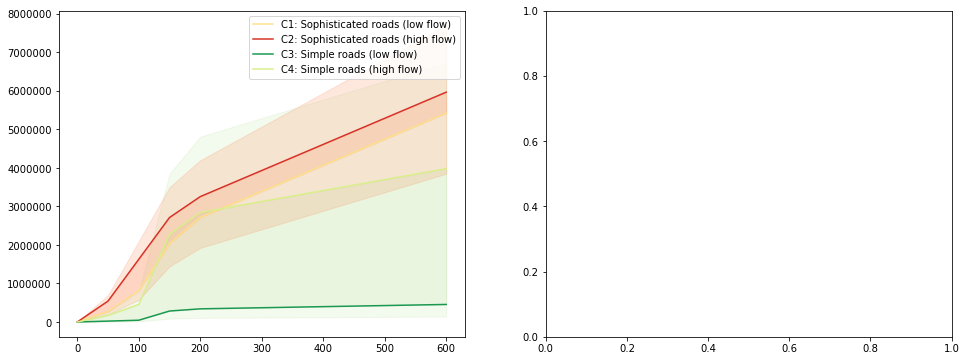

In [139]:
fig,axes = plt.subplots(1,2,figsize=(16,6))

colors_1 = ['#fee08b','#d73027','#1a9850','#d9ef8b'] #lines
colors_2 = ['#fc8d59','#91cf60'] #shading

lower = dict_max_damages['Lower']['motorway']
upper = dict_max_damages['Upper']['motorway']
Range = np.array([lower,0.75*lower+0.25*upper,0.5*lower+0.5*upper,0.25*lower+0.75*upper,upper])


lm = 2 #lane_multiplier, correct so it is a 2*2 road!!!
Range = Range * lm

curvenames = ['C1','C2','C3','C4']
labels = {'C1': 'C1: Sophisticated roads (low flow)',
          'C2': 'C2: Sophisticated roads (high flow)',
          'C3': 'C3: Simple roads (low flow)',
          'C4': 'C4: Simple roads (high flow)'}
depths = [0,50,100,150,200,600]

#Fill area between C1 and C2 (with the med)
axes[0].fill_between(depths, list(interpolators['C3'](depths)*Range[0]),list(interpolators['C4'](depths)*Range[2]),color=colors_2[1],alpha=0.1)
axes[0].fill_between(depths, list(interpolators['C3'](depths)*Range[1]),list(interpolators['C4'](depths)*Range[1]),color=colors_2[1],alpha=0.1)
axes[0].fill_between(depths, list(interpolators['C1'](depths)*Range[2]),list(interpolators['C2'](depths)*Range[4]),color=colors_2[0],alpha=0.2)
axes[0].fill_between(depths, list(interpolators['C1'](depths)*Range[3]),list(interpolators['C2'](depths)*Range[3]),color=colors_2[0],alpha=0.2)


for i,curvename in enumerate(curvenames):
    
    fraction = interpolators[curvename](depths)
    if curvename in ['C1','C2']: #acessories road
        #Min = Range[2]
        Med = Range[3]
        #Max = Range[4]
    elif curvename in ['C3','C4']: #simple road
        #Min = Range[0]
        Med = Range[1]
        #Max = Range[2]
    axes[0].plot(depths,fraction*Med,color=colors_1[i])
axes[0].legend(labels=[labels[c] for c in curvenames])

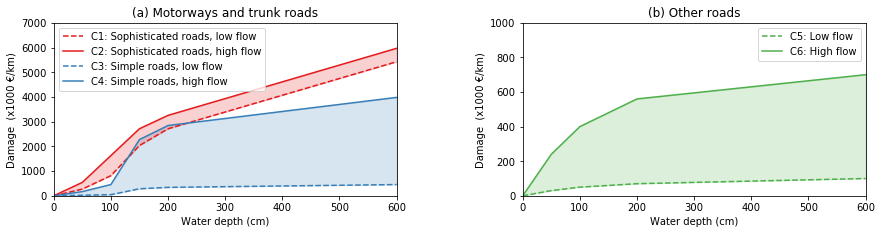

In [199]:
fig,axes = plt.subplots(1,2,figsize=(14,5))

# Plot panel (a)

#colors_1 = ['#fee08b','#d73027','#1a9850','#d9ef8b'] #lines
#colors_2 = ['#fc8d59','#91cf60'] #shading
#colors = ['#1b9e77','#d95f02','#7570b3']
colors = ['#e41a1c','#377eb8','#4daf4a']

lower = dict_max_damages['Lower']['motorway']
upper = dict_max_damages['Upper']['motorway']
Range = np.array([lower,0.75*lower+0.25*upper,0.5*lower+0.5*upper,0.25*lower+0.75*upper,upper])


lm = 2 #lane_multiplier, correct so it is a 2*2 road!!!
Range = Range * lm * 1E-3 #correct for units

curvenames = ['C1','C2','C3','C4']
labels = {'C1': 'C1: Sophisticated roads, low flow',
          'C2': 'C2: Sophisticated roads, high flow',
          'C3': 'C3: Simple roads, low flow',
          'C4': 'C4: Simple roads, high flow'}
depths = [0,50,100,150,200,600]

#Fill area between C1 and C2 (with the med)
axes[0].fill_between(depths, list(interpolators['C3'](depths)*Range[1]),list(interpolators['C4'](depths)*Range[1]),color=colors[1],alpha=0.2)
axes[0].fill_between(depths, list(interpolators['C1'](depths)*Range[3]),list(interpolators['C2'](depths)*Range[3]),color=colors[0],alpha=0.2)

for i,curvename in enumerate(curvenames):
    
    fraction = interpolators[curvename](depths)
    if curvename in ['C1','C2']: #acessories road
        #Min = Range[2]
        Med = Range[3]
        #Max = Range[4]
    elif curvename in ['C3','C4']: #simple road
        #Min = Range[0]
        Med = Range[1]
        #Max = Range[2]
    color_pos = i // 2
    ls = '-'
    if i % 2 == 0:
        ls = '--'
    axes[0].plot(depths,fraction*Med,color=colors[color_pos],linestyle = ls)
axes[0].legend(labels=[labels[c] for c in curvenames])
axes[0].set_title('(a) Motorways and trunk roads')
axes[0].set_xlim(0,600)
axes[0].set_ylim(0,7E3)
axes[0].set_xlabel('Water depth (cm)')
axes[0].set_ylabel('Damage  (x1000 \u20ac/km)')


# Plot panel (b)
curvenames = ['C5','C6']
labels = {'C5': 'C5: Low flow',
          'C6': 'C6: High flow'}

lower = dict_max_damages['Lower']['primary']
upper = dict_max_damages['Upper']['primary']
Range = np.array([lower,0.75*lower+0.25*upper,0.5*lower+0.5*upper,0.25*lower+0.75*upper,upper])

Range = Range * 1E-3 #correct for units

#Fill area between C1 and C2 (with the med)
axes[1].fill_between(depths, list(interpolators['C5'](depths)*Range[2]),list(interpolators['C6'](depths)*Range[2]),color=colors[2],alpha=0.2)
for i,curvename in enumerate(curvenames):
    fraction = interpolators[curvename](depths)
    Med = Range[2]
    ls = '-'
    if i % 2 ==0: ls = '--'
    axes[1].plot(depths,fraction*Med,color=colors[2],linestyle=ls)
axes[1].legend(labels=[labels[c] for c in curvenames])
axes[1].set_title('(b) Other roads')
axes[1].set_xlim(0,600)
axes[1].set_ylim(0,1E3)
axes[1].set_xlabel('Water depth (cm)')
axes[1].set_ylabel('Damage  (x1000 \u20ac/km)')

#axes[0].plot([0,600],[1E6,1E6],color='black',linestyle=(0, (5, 10)),alpha=0.5)

fig.tight_layout(pad=7.0)
plt.savefig('Fig_4_new.png',format = 'png',dpi=300,bbox_inches='tight')

<Figure size 432x288 with 0 Axes>